# Cat Meow Classification
#### Source: https://www.kaggle.com/andrewmvd/cat-meow-classification

Naming convention for files -> CNNNNNBBSSOOOOO_RXX, where:

* C = emission context (values: B = brushing; F = waiting for food; I: isolation in an unfamiliar environment);
* NNNNN = cat’s unique ID;
* BB = breed (values: MC = Maine Coon; EU: European Shorthair);
* SS = sex (values: FI = female, intact; FN: female, neutered; MI: male, intact; MN: male, neutered);
*OOOOO = cat owner’s unique ID;
* R = recording session (values: 1, 2 or 3)
* XX = vocalization counter (values: 01..99)


In [1]:
import os
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import librosa
from PIL import Image

## Data Processing Part

#### Listing files in Data_Cat-Meow-Classification directory

In [2]:
cats=os.listdir("Data_Cat-Meow-Classification")
cats

['B_ANI01_MC_FN_SIM01_101.wav',
 'B_ANI01_MC_FN_SIM01_102.wav',
 'B_ANI01_MC_FN_SIM01_103.wav',
 'B_ANI01_MC_FN_SIM01_301.wav',
 'B_ANI01_MC_FN_SIM01_302.wav',
 'B_ANI01_MC_FN_SIM01_303.wav',
 'B_BAC01_MC_MN_SIM01_101.wav',
 'B_BAC01_MC_MN_SIM01_102.wav',
 'B_BAC01_MC_MN_SIM01_103.wav',
 'B_BAC01_MC_MN_SIM01_202.wav',
 'B_BAC01_MC_MN_SIM01_301.wav',
 'B_BAC01_MC_MN_SIM01_303.wav',
 'B_BRA01_MC_MN_SIM01_101.wav',
 'B_BRA01_MC_MN_SIM01_104.wav',
 'B_BRA01_MC_MN_SIM01_105.wav',
 'B_BRA01_MC_MN_SIM01_106.wav',
 'B_BRA01_MC_MN_SIM01_301.wav',
 'B_BRA01_MC_MN_SIM01_302.wav',
 'B_BRA01_MC_MN_SIM01_303.wav',
 'B_BRI01_MC_FI_SIM01_101.wav',
 'B_BRI01_MC_FI_SIM01_102.wav',
 'B_BRI01_MC_FI_SIM01_201.wav',
 'B_BRI01_MC_FI_SIM01_202.wav',
 'B_BRI01_MC_FI_SIM01_301.wav',
 'B_BRI01_MC_FI_SIM01_302.wav',
 'B_BRI01_MC_FI_SIM01_303.wav',
 'B_CAN01_EU_FN_GIA01_101.wav',
 'B_CAN01_EU_FN_GIA01_102.wav',
 'B_CAN01_EU_FN_GIA01_103.wav',
 'B_CAN01_EU_FN_GIA01_104.wav',
 'B_CAN01_EU_FN_GIA01_105.wav',
 'B_CAN0

#### Finding number of tracks

In [3]:
len(cats)

440

#### Extracting data from files

In [4]:
def process_cats_to_dataframe(cats):

    # iterating through each file geting filename (which will be ID) and extracted cat features using split
    cat_list=[[cat] + cat.split(".")[0].split("_") for cat in cats]

    # returning DtatFrame
    return pd.DataFrame(cat_list, columns=["Filename", "Emission_Context", "Cat_ID", "Breed", "Sex", "Cat_Owner_ID", "Recording_Session"])

In [5]:
cats_df = process_cats_to_dataframe(cats)
cats_df

,Filename,Emission_Context,Cat_ID,Breed,Sex,Cat_Owner_ID,Recording_Session
0,B_ANI01_MC_FN_SIM01_101.wav,B,ANI01,MC,FN,SIM01,101
1,B_ANI01_MC_FN_SIM01_102.wav,B,ANI01,MC,FN,SIM01,102
2,B_ANI01_MC_FN_SIM01_103.wav,B,ANI01,MC,FN,SIM01,103
3,B_ANI01_MC_FN_SIM01_301.wav,B,ANI01,MC,FN,SIM01,301
4,B_ANI01_MC_FN_SIM01_302.wav,B,ANI01,MC,FN,SIM01,302
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,I,WHO01,MC,FI,SIM01,114
436,I_WHO01_MC_FI_SIM01_115.wav,I,WHO01,MC,FI,SIM01,115
437,I_WHO01_MC_FI_SIM01_116.wav,I,WHO01,MC,FI,SIM01,116
438,I_WHO01_MC_FI_SIM01_201.wav,I,WHO01,MC,FI,SIM01,201


#### Writing DataFrame to csv

In [6]:
cats_df.to_csv("Data_Cat-Meow-Classification-Cats.csv", index=False)

### Spectrograms

#### Creating spectrograms for each wav file

In [7]:
def cats_wav_to_specgram(cats):
    # generating directory to hold spectrograms if it doesn't exit
    pathlib.Path("./Data_Cat-Meow-Img").mkdir(exist_ok=True)

    for filename in cats:
        # path to file
        file = f'Data_Cat-Meow-Classification/{filename}'
        # reading file
        audio, sr = librosa.load(file, mono=True)
        # calculating and plotting spectrogram
        plt.specgram(audio, NFFT=2048, Fs=2, noverlap=128, cmap="inferno", scale="dB")
        plt.axis("off")
        # saving spectrogram in directory
        plt.savefig(f'./Data_Cat-Meow-Img/{filename[:-4]}.png')
        # clearing figure for new image
        plt.clf()

In [8]:
cats_wav_to_specgram(cats)

C:\Users\6trze\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


<Figure size 432x288 with 0 Axes>

#### Showing spectrogram of first image

(-0.5, 431.5, 287.5, -0.5)

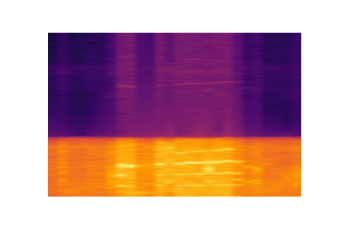

In [9]:
img_path = f'./Data_Cat-Meow-Img/{os.listdir("./Data_Cat-Meow-Img")[0]}'
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')

### Calculating sound statistics for each file

#### Creating DataFrame to hold sound statistcs
* RMS - Root Mean Squared
* Chroma STFT - vector indicating how much energy of each pitch (C, C#, D, ..., B) is present in signal
* Spectral Centroid - indicates where center of mass of signal is located
* Spectral Bandwidth - indicates diffrence between lower and upper frequencies of continous band of frequencies
* Spectral Roloff - indicates frequency at which high frequencies decline to 0
* Zero-Crossing Rate - measures smoothness of signal

In [10]:
def cats_wav_to_features_dataframe(cats):
    cat_list = []

    for filename in cats:
        # path to file
        file = f'Data_Cat-Meow-Classification/{filename}'
        # reading file
        audio, sr = librosa.load(file, mono=True)

        #features
        rms = librosa.feature.rms(y=audio)
        chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr)
        spec_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        spec_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
        spec_roloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y=audio)

        # grabbing means of each feature
        cat = [filename, np.mean(rms), np.mean(chroma_stft), np.mean(spec_centroid), np.mean(spec_bandwidth), np.mean(spec_roloff), np.mean(zcr)]

        cat_list.append(cat)
    
    # returning DataFrame with filename and calculated means of features
    return pd.DataFrame(cat_list, columns=["Filename", "RMS", "Chroma_STFT", "Spectral_Centroid", "Spectral_Bandwidth", "Spectral_Roloff", "Zero_Crossing_Rate"])

In [11]:
df = cats_wav_to_features_dataframe(cats)
df

,Filename,RMS,Chroma_STFT,Spectral_Centroid,Spectral_Bandwidth,Spectral_Roloff,Zero_Crossing_Rate
0,B_ANI01_MC_FN_SIM01_101.wav,0.054480,0.375909,1707.714547,852.376527,2540.047940,0.163372
1,B_ANI01_MC_FN_SIM01_102.wav,0.004253,0.594699,1527.240720,928.602006,2634.344286,0.134175
2,B_ANI01_MC_FN_SIM01_103.wav,0.008073,0.476229,1597.103459,921.940298,2637.127216,0.151386
3,B_ANI01_MC_FN_SIM01_301.wav,0.021183,0.436710,1681.916888,877.889918,2624.036133,0.153294
4,B_ANI01_MC_FN_SIM01_302.wav,0.006711,0.536979,1573.903089,968.035926,2793.835227,0.146760
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,0.031271,0.439976,1549.469086,959.971660,2748.516244,0.125942
436,I_WHO01_MC_FI_SIM01_115.wav,0.033841,0.418833,1627.320678,963.352963,2807.194407,0.135319
437,I_WHO01_MC_FI_SIM01_116.wav,0.037435,0.415613,1533.723133,967.494816,2825.530740,0.115505
438,I_WHO01_MC_FI_SIM01_201.wav,0.043118,0.385446,1635.612155,965.360239,2781.372070,0.140001


#### Writing DataFrame to csv

In [12]:
df.to_csv("./Data_Cat-Meow-Classification-Features.csv", index=False )

### Combining both dataframes

#### Reading files

In [13]:
features_df = pd.read_csv("Data_Cat-Meow-Classification-Features.csv")
features_df

,Filename,RMS,Chroma_STFT,Spectral_Centroid,Spectral_Bandwidth,Spectral_Roloff,Zero_Crossing_Rate
0,B_ANI01_MC_FN_SIM01_101.wav,0.054480,0.375909,1707.714547,852.376527,2540.047940,0.163372
1,B_ANI01_MC_FN_SIM01_102.wav,0.004253,0.594699,1527.240720,928.602006,2634.344286,0.134175
2,B_ANI01_MC_FN_SIM01_103.wav,0.008073,0.476229,1597.103459,921.940298,2637.127216,0.151386
3,B_ANI01_MC_FN_SIM01_301.wav,0.021183,0.436710,1681.916888,877.889918,2624.036133,0.153294
4,B_ANI01_MC_FN_SIM01_302.wav,0.006711,0.536979,1573.903089,968.035926,2793.835227,0.146760
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,0.031271,0.439976,1549.469086,959.971660,2748.516244,0.125942
436,I_WHO01_MC_FI_SIM01_115.wav,0.033841,0.418833,1627.320678,963.352963,2807.194407,0.135319
437,I_WHO01_MC_FI_SIM01_116.wav,0.037435,0.415613,1533.723133,967.494816,2825.530740,0.115505
438,I_WHO01_MC_FI_SIM01_201.wav,0.043118,0.385446,1635.612155,965.360239,2781.372070,0.140001


In [14]:
cats_df = pd.read_csv("Data_Cat-Meow-Classification-Cats.csv")
cats_df

,Filename,Emission_Context,Cat_ID,Breed,Sex,Cat_Owner_ID,Recording_Session
0,B_ANI01_MC_FN_SIM01_101.wav,B,ANI01,MC,FN,SIM01,101
1,B_ANI01_MC_FN_SIM01_102.wav,B,ANI01,MC,FN,SIM01,102
2,B_ANI01_MC_FN_SIM01_103.wav,B,ANI01,MC,FN,SIM01,103
3,B_ANI01_MC_FN_SIM01_301.wav,B,ANI01,MC,FN,SIM01,301
4,B_ANI01_MC_FN_SIM01_302.wav,B,ANI01,MC,FN,SIM01,302
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,I,WHO01,MC,FI,SIM01,114
436,I_WHO01_MC_FI_SIM01_115.wav,I,WHO01,MC,FI,SIM01,115
437,I_WHO01_MC_FI_SIM01_116.wav,I,WHO01,MC,FI,SIM01,116
438,I_WHO01_MC_FI_SIM01_201.wav,I,WHO01,MC,FI,SIM01,201


#### Copying datasets to be able to quickly revert changes if necessary without need to reread file

In [15]:
features_data = features_df.copy()
features_data

,Filename,RMS,Chroma_STFT,Spectral_Centroid,Spectral_Bandwidth,Spectral_Roloff,Zero_Crossing_Rate
0,B_ANI01_MC_FN_SIM01_101.wav,0.054480,0.375909,1707.714547,852.376527,2540.047940,0.163372
1,B_ANI01_MC_FN_SIM01_102.wav,0.004253,0.594699,1527.240720,928.602006,2634.344286,0.134175
2,B_ANI01_MC_FN_SIM01_103.wav,0.008073,0.476229,1597.103459,921.940298,2637.127216,0.151386
3,B_ANI01_MC_FN_SIM01_301.wav,0.021183,0.436710,1681.916888,877.889918,2624.036133,0.153294
4,B_ANI01_MC_FN_SIM01_302.wav,0.006711,0.536979,1573.903089,968.035926,2793.835227,0.146760
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,0.031271,0.439976,1549.469086,959.971660,2748.516244,0.125942
436,I_WHO01_MC_FI_SIM01_115.wav,0.033841,0.418833,1627.320678,963.352963,2807.194407,0.135319
437,I_WHO01_MC_FI_SIM01_116.wav,0.037435,0.415613,1533.723133,967.494816,2825.530740,0.115505
438,I_WHO01_MC_FI_SIM01_201.wav,0.043118,0.385446,1635.612155,965.360239,2781.372070,0.140001


In [16]:
cats_data = cats_df.copy()
cats_data

,Filename,Emission_Context,Cat_ID,Breed,Sex,Cat_Owner_ID,Recording_Session
0,B_ANI01_MC_FN_SIM01_101.wav,B,ANI01,MC,FN,SIM01,101
1,B_ANI01_MC_FN_SIM01_102.wav,B,ANI01,MC,FN,SIM01,102
2,B_ANI01_MC_FN_SIM01_103.wav,B,ANI01,MC,FN,SIM01,103
3,B_ANI01_MC_FN_SIM01_301.wav,B,ANI01,MC,FN,SIM01,301
4,B_ANI01_MC_FN_SIM01_302.wav,B,ANI01,MC,FN,SIM01,302
...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,I,WHO01,MC,FI,SIM01,114
436,I_WHO01_MC_FI_SIM01_115.wav,I,WHO01,MC,FI,SIM01,115
437,I_WHO01_MC_FI_SIM01_116.wav,I,WHO01,MC,FI,SIM01,116
438,I_WHO01_MC_FI_SIM01_201.wav,I,WHO01,MC,FI,SIM01,201


#### Merging datasets

In [17]:
data = pd.merge(left=features_data, right=cats_data, on="Filename")
data

,Filename,RMS,Chroma_STFT,Spectral_Centroid,Spectral_Bandwidth,Spectral_Roloff,Zero_Crossing_Rate,Emission_Context,Cat_ID,Breed,Sex,Cat_Owner_ID,Recording_Session
0,B_ANI01_MC_FN_SIM01_101.wav,0.054480,0.375909,1707.714547,852.376527,2540.047940,0.163372,B,ANI01,MC,FN,SIM01,101
1,B_ANI01_MC_FN_SIM01_102.wav,0.004253,0.594699,1527.240720,928.602006,2634.344286,0.134175,B,ANI01,MC,FN,SIM01,102
2,B_ANI01_MC_FN_SIM01_103.wav,0.008073,0.476229,1597.103459,921.940298,2637.127216,0.151386,B,ANI01,MC,FN,SIM01,103
3,B_ANI01_MC_FN_SIM01_301.wav,0.021183,0.436710,1681.916888,877.889918,2624.036133,0.153294,B,ANI01,MC,FN,SIM01,301
4,B_ANI01_MC_FN_SIM01_302.wav,0.006711,0.536979,1573.903089,968.035926,2793.835227,0.146760,B,ANI01,MC,FN,SIM01,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,I_WHO01_MC_FI_SIM01_114.wav,0.031271,0.439976,1549.469086,959.971660,2748.516244,0.125942,I,WHO01,MC,FI,SIM01,114
436,I_WHO01_MC_FI_SIM01_115.wav,0.033841,0.418833,1627.320678,963.352963,2807.194407,0.135319,I,WHO01,MC,FI,SIM01,115
437,I_WHO01_MC_FI_SIM01_116.wav,0.037435,0.415613,1533.723133,967.494816,2825.530740,0.115505,I,WHO01,MC,FI,SIM01,116
438,I_WHO01_MC_FI_SIM01_201.wav,0.043118,0.385446,1635.612155,965.360239,2781.372070,0.140001,I,WHO01,MC,FI,SIM01,201


## Deep Learning Part

#### Importing libraries

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf

#### Grabbing features and target

In [19]:
dataset = data[['RMS', 'Chroma_STFT', 'Spectral_Centroid','Spectral_Bandwidth', 'Spectral_Roloff', 'Zero_Crossing_Rate','Emission_Context']]
dataset

,RMS,Chroma_STFT,Spectral_Centroid,Spectral_Bandwidth,Spectral_Roloff,Zero_Crossing_Rate,Emission_Context
0,0.054480,0.375909,1707.714547,852.376527,2540.047940,0.163372,B
1,0.004253,0.594699,1527.240720,928.602006,2634.344286,0.134175,B
2,0.008073,0.476229,1597.103459,921.940298,2637.127216,0.151386,B
3,0.021183,0.436710,1681.916888,877.889918,2624.036133,0.153294,B
4,0.006711,0.536979,1573.903089,968.035926,2793.835227,0.146760,B
...,...,...,...,...,...,...,...
435,0.031271,0.439976,1549.469086,959.971660,2748.516244,0.125942,I
436,0.033841,0.418833,1627.320678,963.352963,2807.194407,0.135319,I
437,0.037435,0.415613,1533.723133,967.494816,2825.530740,0.115505,I
438,0.043118,0.385446,1635.612155,965.360239,2781.372070,0.140001,I


#### Spliting set to X and y

In [20]:
X = dataset.drop("Emission_Context", axis=1).values
y = dataset[["Emission_Context"]].values

In [21]:
X

array([[5.44798800e-02, 3.75908850e-01, 1.70771455e+03, 8.52376527e+02,
        2.54004794e+03, 1.63372001e-01],
       [4.25314440e-03, 5.94698970e-01, 1.52724072e+03, 9.28602006e+02,
        2.63434429e+03, 1.34174962e-01],
       [8.07318100e-03, 4.76228620e-01, 1.59710346e+03, 9.21940298e+02,
        2.63712722e+03, 1.51385968e-01],
       ...,
       [3.74350770e-02, 4.15613140e-01, 1.53372313e+03, 9.67494816e+02,
        2.82553074e+03, 1.15505053e-01],
       [4.31178800e-02, 3.85445920e-01, 1.63561215e+03, 9.65360239e+02,
        2.78137207e+03, 1.40001085e-01],
       [2.75548940e-02, 3.97898670e-01, 1.50582984e+03, 9.56497132e+02,
        2.66042725e+03, 1.22991943e-01]])

In [22]:
y

array([['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
      

In [23]:
ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

#### Splitting data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=97)

#### Scaling X features

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model

#### Building model

In [26]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=256, activation="relu"))
ann.add(tf.keras.layers.Dense(units=128, activation="relu"))
ann.add(tf.keras.layers.Dense(units=64, activation="relu"))
ann.add(tf.keras.layers.Dense(units=32, activation="relu"))
ann.add(tf.keras.layers.Dense(units=3, activation="sigmoid"))

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Fitting data

In [27]:
ann.fit(X_train, y_train, epochs=200, batch_size=128)

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 1.0868 - accuracy: 0.4375
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 1.0390 - accuracy: 0.5199
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 1.0071 - accuracy: 0.5170
Epoch 4/200
3/3 [==============================] - 0s 1ms/step - loss: 0.9815 - accuracy: 0.5312
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 0.9557 - accuracy: 0.5710
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 0.9330 - accuracy: 0.5966
Epoch 7/200
3/3 [==============================] - 0s 1ms/step - loss: 0.9119 - accuracy: 0.5994
Epoch 8/200
3/3 [==============================] - 0s 2ms/step - loss: 0.8942 - accuracy: 0.5881
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 0.8723 - accuracy: 0.6080
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 0.8557 - accuracy: 0.6136
Epoch 11/200
3/3 [===========

#### Plotting loss and accuracy

<AxesSubplot:>

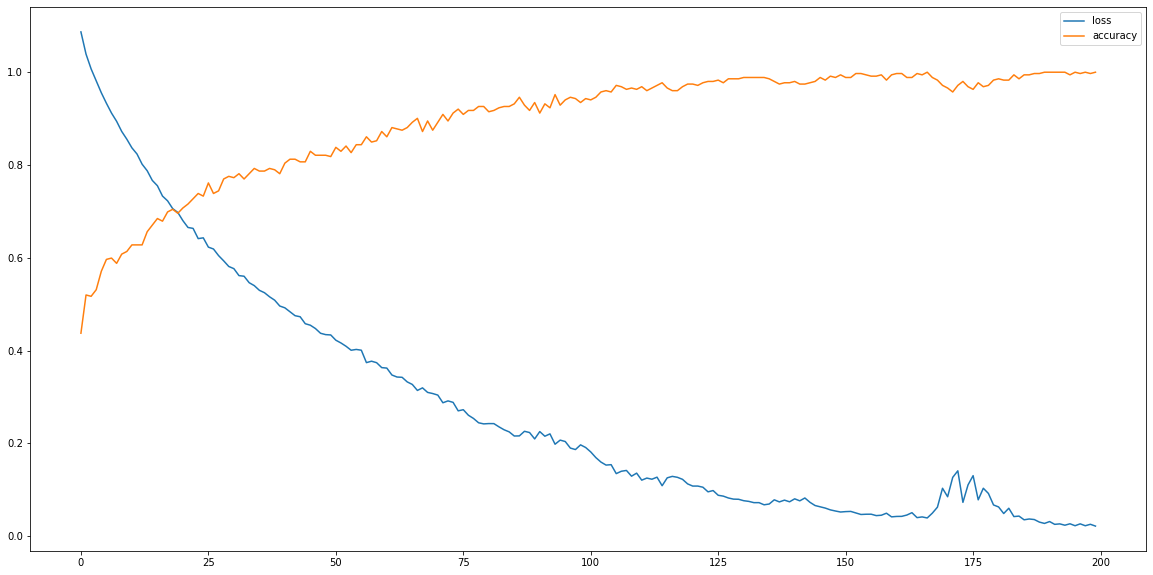

In [28]:
pd.DataFrame(ann.history.history).plot(figsize=(20,10))

#### Getting predictions

In [29]:
predictions = ann.predict(X_test)
predictions

array([[9.9998528e-01, 3.5048300e-01, 2.2437403e-01],
       [9.9994421e-01, 9.9999332e-01, 1.5662744e-06],
       [5.4162872e-01, 2.0557642e-04, 9.9999720e-01],
       [9.9617481e-01, 9.1489393e-01, 5.2150279e-02],
       [6.2714857e-01, 9.5974004e-01, 5.4357558e-02],
       [2.0013765e-01, 9.6586066e-01, 2.8096211e-01],
       [8.7176251e-01, 3.1476966e-01, 8.2260472e-01],
       [9.9979722e-01, 6.5493745e-01, 2.0273829e-01],
       [1.9267201e-04, 8.8499439e-01, 9.7786522e-01],
       [7.7847815e-01, 4.6469915e-01, 8.4054840e-01],
       [5.1106304e-01, 3.7432823e-05, 9.9999964e-01],
       [2.9583275e-03, 9.9972802e-01, 3.8329363e-03],
       [3.0119872e-01, 6.5048397e-02, 9.9030805e-01],
       [9.9998856e-01, 1.4539421e-01, 2.7193779e-01],
       [8.5645688e-01, 1.1610389e-03, 9.9996591e-01],
       [4.7539285e-01, 2.2477618e-01, 9.6898353e-01],
       [6.4762551e-01, 2.6960060e-01, 9.8937064e-01],
       [9.9250340e-01, 1.3507476e-01, 8.7691295e-01],
       [3.0692884e-01, 3.276

#### Score

In [30]:
score = ann.evaluate(X_test, y_test, verbose=0)
score[1]

0.5454545617103577